# Programming Machine Learning Lab
# Exercise 10

**General Instructions:**

1. You need to submit the PDF as well as the filled notebook file.
1. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_Exercise_10.xxx"**
1. Complete all your tasks and then do a clean run before generating the final PDF. (_Clear All Ouputs_ and _Run All_ commands in Jupyter notebook)

**Exercise Specific instructions::**

1. You are allowed to use only NumPy and Pandas (unless stated otherwise). You can use any library for visualizations.
1. Incase you require a GPU for the 2nd Part, try Google Colab or Kaggle and create a separate PDF report for that.

**NLP - Word2Vec Model**

In this part, we will learn on how neural networks work on language data. We would be implementing a simple *Continuous bag-of-words (CBOW)* model. (You can read more at https://arxiv.org/abs/1301.3781v3)

**You can use any deep learning library (for example, pytorch or tensorflow) for this part.**

- Create a custom dataloader for Continuous bag-of-words (CBOW) model. This would take the whole text as input and generate samples to train the model. CBOW usualy takes 'n' words before and after a target word and tries to predict the target word. We will use n=2, so the output of the dataloader would be (B,4), (B,1) for X and y respectively (Where B is batch-size).

- Creata a Neural Network with folowing specificaitons 
    - Embedding layer of size 16
    - 2 x Linear layer of size 32
    - ReLU Activation for hidden layer

Train the model for 50 epochs with cross-entropy loss and visualize the final embeddings to understand similarity between the learned word embeddings.

In [27]:
from setuptools import distutils
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Activation,Lambda,Flatten 
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import backend 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

In [9]:
file = open('raw_text.txt', 'r', encoding='utf-8')
data = file.read()  # Read the text


In [20]:
data_sc = data.split('\n') 
print(data_sc)
data_clean = [x.replace('.  ','') for x in data_sc]
print(f"The cleansed data is:\n {data_clean}") ##Clean the data such that whitespaces and \n are removed from the dataset


['During my second month of nursing school, our professor gave us a pop quiz.  ', 'I was a conscientious student and had breezed through the questions, until I read the last one: ', '“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke. ', 'I had seen the cleaning woman several times. She was tall, dark-haired and in her 50s, but how would I know her name?  ', 'I handed in my paper, leaving the last question blank.  Before class ended, one student asked if the last question would count toward our quiz grade.  ', '“Absolutely,” said the professor.  “In your careers you will meet many people. All are significant. They deserve your attention and care, ', 'even if all you do is smile and say ‘hello’. I’ve never forgotten that lesson. I also learned her name was Dorothy.', '']
The cleansed data is:
 ['During my second month of nursing school, our professor gave us a pop quiz', 'I was a conscientious student and had breezed through the questions, un

In [23]:
#Convert the corpus to a sequence of integers 
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(data_clean)
sequences = tokenizer.texts_to_sequences(data_clean)
print( ' This is what the data looks like after converting It into integers :\n' ) 
print(sequences)
print(type(sequences))

 This is what the data looks like after converting It into integers :

[[27, 9, 28, 29, 5, 30, 10, 11, 31, 32, 33, 12, 34, 13], [2, 3, 12, 35, 14, 4, 15, 36, 37, 1, 38, 39, 2, 40, 1, 6, 16], [41, 17, 1, 42, 7, 5, 1, 18, 43, 44, 1, 10, 19, 45, 46, 3, 47, 48, 5, 49], [2, 15, 50, 1, 51, 18, 52, 53, 54, 3, 55, 56, 57, 4, 20, 8, 58, 59, 60, 21, 2, 61, 8, 7], [2, 62, 20, 9, 63, 64, 1, 6, 22, 65, 66, 67, 16, 14, 68, 23, 1, 6, 22, 21, 69, 70, 11, 13, 71], [72, 19, 73, 1, 74, 24, 75, 25, 76, 77, 78, 79, 26, 80, 81, 82, 83, 24, 84, 4, 85], [86, 23, 26, 25, 87, 17, 88, 4, 89, 90, 91, 92, 93, 94, 95, 2, 96, 97, 8, 7, 3, 98], []]
<class 'list'>


In [38]:
##Define the hyper-parameter 
vocab_size=len(tokenizer.word_index)+1 
embedding_size=16
window_size=2
#Generate the context-target pairs 
contexts=[]
targets=[]
for sequence in sequences:
    for i in range(window_size,len(sequence) - window_size ):
        context = sequence[i - window_size: i ] + sequence[i+1:i + window_size + 1 ] 
        target=sequence[i]
        contexts.append(context) 
        targets.append(target)
#Converting contexts and targets to uumpy array for tensorflow to convert X=np.array(contexts)
X=np.array(contexts)
targets = np.array(targets)

In [35]:
print(X.shape) 
print(targets) 
print(type(X)) 
print((targets.shape))

(115, 4)
[28 29  5 30 10 11 31 32 33 12 12 35 14  4 15 36 37  1 38 39  2 40  1  1
 42  7  5  1 18 43 44  1 10 19 45 46  3 47 48 50  1 51 18 52 53 54  3 55
 56 57  4 20  8 58 59 60 21  2 61 20  9 63 64  1  6 22 65 66 67 16 14 68
 23  1  6 22 21 69 70 11 73  1 74 24 75 25 76 77 78 79 26 80 81 82 83 24
 84 26 25 87 17 88  4 89 90 91 92 93 94 95  2 96 97  8  7]
<class 'numpy.ndarray'>
(115,)


In [52]:
##Define the CBOW Model
#Embedding layer of size 16 
# #2 x Linear layer of size 32
#ReLU Activation for hidden layer 
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_shape=(2*window_size,)))
model.add(Flatten())
model.add(Dense(32,activation='relu')) #Adding first linear layer
model.add(Dense(32,activation='relu')) #Adding second linear layer, where second layer takes the output of first layer as inputs 
model.add(Dense(units=vocab_size,activation='softmax')) #0utput Layer, softmax predicts class probabilities

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
#Define the number of epochs to train for:
e = 60
#Training and saving the model to a variable for visualization 
history = model.fit (X, targets, epochs=e)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 4, 16)          │         1,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 99)             │         3,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,987 (31.20 KB)

 Trainable params: 7,987 (31.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0389 - loss: 4.5947  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0177 - loss: 4.5885     
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0528 - loss: 4.5833 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0650 - loss: 4.5780 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0820 - loss: 4.5707 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1143 - loss: 4.5649 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0952 - loss: 4.5593 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1300 - loss: 4.5511 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1591 - loss: 4.5408 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1362 - loss: 4.5289 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1612 - loss: 4.5173 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1373 - loss: 4.50

In [53]:
embeddings = model.get_weights()[0]
#Perform PCA to reduce dimensionality of the embeddings 
pca = PCA(n_components=2) 
reduced_embeddings = pca.fit_transform(embeddings) 
print(embeddings.shape) 
print(reduced_embeddings.shape)

(99, 16)
(99, 2)


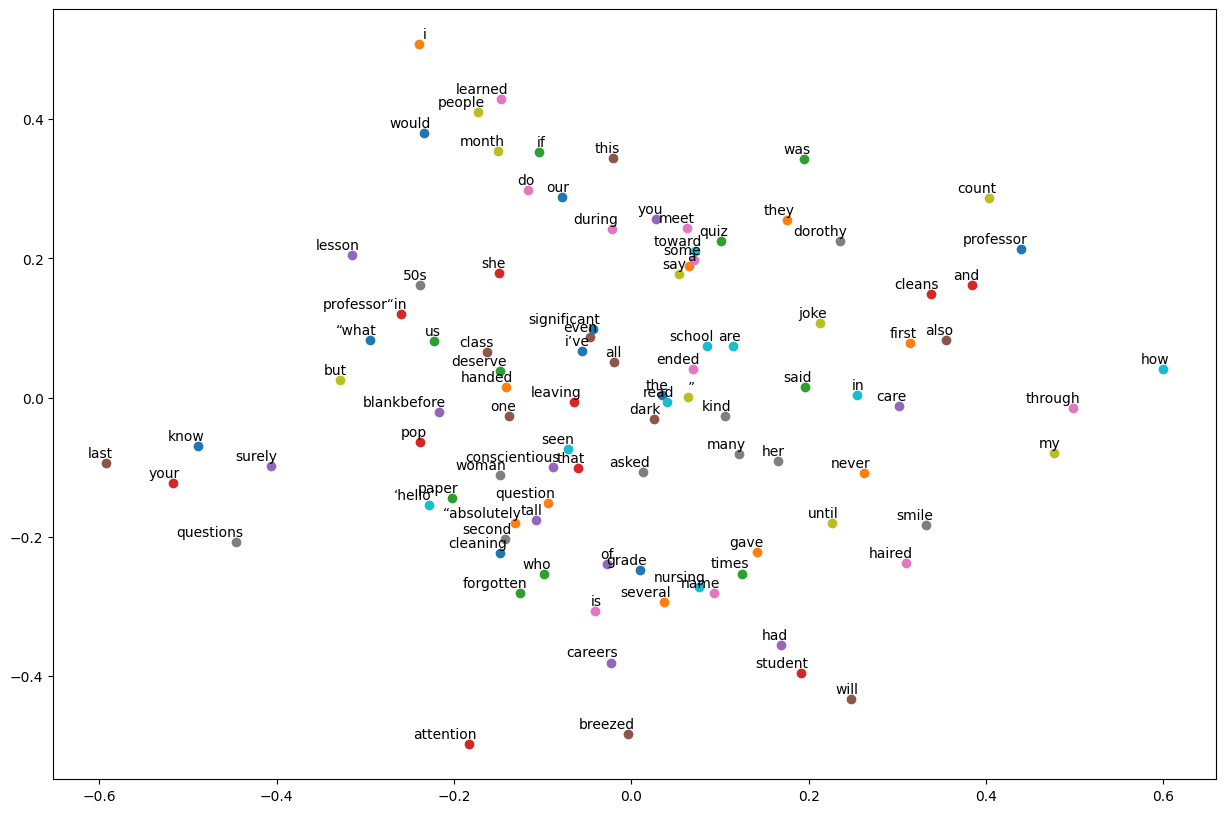

In [54]:
plt.figure(figsize=(15, 10)) 
for i, word in enumerate(tokenizer.word_index.keys()) : 
    x, y = reduced_embeddings[i] 
    plt.scatter(x, y) 
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords= 'offset points' , ha= 'right' , va= 'bottom' )
plt.show()